<img src="https://dunia.esa.int/assets/DUNIA_icon-c174c3dd.png" alt="Dunia logo" style="height: 85px;"/>  <img src="https://cds.climate.copernicus.eu/sites/default/files/inline-images/c3s-logo%20%281%29.png" alt="c3s logo" style="height: 85px;"/> <img src="https://cds.climate.copernicus.eu/sites/default/files/cdsapp/copernicus-logo.png" alt="Copernicus logo" style="height: 85px;"/>   <img src="https://cds.climate.copernicus.eu/sites/default/files/inline-images/logo-ecmwf.png" alt="ecmwf logo" style="height: 85px;"/>  <img src="" alt="" style="height: 85px;"/> <img src="https://www.dlr.de/en/images/2021/3/dlr-logo-black/@@images/image-2000-3854ff06963e6729b8dc5cd4c7711d99.jpeg" alt="DLR Logo" style="height: 85px;"/>    <img src="https://hvplot.holoviz.org/_static/logo_horizontal.svg" alt="holoviz Logo" style="height: 80px;"/>     <img src="https://docs.xarray.dev/en/stable/_static/Xarray_Logo_RGB_Final.svg" alt="xarray" style="height: 85px;"/>


# Accessing Climate Data from the Copernicus Climate Data Store API

### Installing necessary dependencies
This step is only needed on first run to install all needed dependencies of this notebook

In [ ]:
! pip install cdsapi cfgrib xarray cartopy hvplot  ecmwflibs geoviews 

## Getting an API Key for the Climate Data from the Copernicus Climate Data Store

Please visit https://cds.climate.copernicus.eu to register a free account to access the copernicus climate change API.

After registration you can retreive your CDS Api-Key from https://cds.climate.copernicus.eu/api-how-to 

This key only has to be copied to your Notebook once and can hence be reused 

In [2]:
import os
import getpass
cdsConfFile = os.path.expanduser( '~' )+'/.cdsapirc'
if not os.path.isfile(cdsConfFile):
    #print("Please enter your CDS API Key below") 
    CdsApiKey = getpass.getpass("Please enter your CDS API Key below in the format key:....")
    with open(cdsConfFile, 'w') as file:
        file.write("url: https://cds.climate.copernicus.eu/api/v2\n")
        file.write(CdsApiKey)
    print("Key saved to "+ cdsConfFile)
    del CdsApiKey
    

## Available Datasets

For a list of available Datasets see https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset

At the end of the selectio Progress it will show you the API Request Command

For this tutorial we have chooesen  the ERA5-Land monthly averaged data as an example 
For more information on this dataset see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview


## Setting up your area of interest and times of interest 

In [3]:
years = [str(y) for y in range(2020,2023 +1 )]
months = [str(m).zfill(2) for m in range(1,12 +1)]
#AOI Coordinates given as North West South East 
AOI = [20, -18, 2, 11,]

downloadFileName = "era4_temperature_monthly_subset.grib"



### Order subsetting and download of the ERA5-Land monthly averaged data from 1950 to present : 2m Temperature
This will subset the data to the years and months specified above and download the data to the filename specified. Afterwards we can analyse and Plot the data locally in this Notebook



In [4]:
import cdsapi
#create a client with our access key specified before and order the processing via cds api
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': '2m_temperature',
        'year': years,
        'month': months,
        'area': AOI,
        'format': 'grib',
        'time': '00:00',
    },
    downloadFileName)

2024-02-21 08:02:39,990 INFO Welcome to the CDS
2024-02-21 08:02:39,991 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means
2024-02-21 08:02:40,321 INFO Request is completed
2024-02-21 08:02:40,322 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/adaptor.mars.internal-1708362547.9866345-18935-6-9f61de53-97e2-4c25-84b4-a59e740716f5.grib to era4_temperature_monthly_subset.grib (3.9M)
2024-02-21 08:02:42,656 INFO Download rate 1.7M/s   


Result(content_length=4060800,content_type=application/x-grib,location=https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/adaptor.mars.internal-1708362547.9866345-18935-6-9f61de53-97e2-4c25-84b4-a59e740716f5.grib)

### Processing Status
You can see the processing status of your request at 
https://cds.climate.copernicus.eu/cdsapp#!/yourrequests


Due to current migration of the Climate Data Store at time of testing data retival had very long waiting time for data access (over a day during testing). 
You can rerun the cell above to trigger download in the case that you Notebook timed out. However be adviced the ordered subset will only be available for download for a short time

### Accessing the local data via xarray and cfgrib libraries

In [5]:
import xarray as xr
import matplotlib.pyplot as plt

Importing the downloaded data into a datset using the cfgrib library 


In [20]:
era5 = xr.load_dataset(downloadFileName , engine="cfgrib")
era5

<xarray.Dataset>
Dimensions:     (time: 48, latitude: 181, longitude: 291)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2023-12-01
    step        timedelta64[ns] 1 days
    surface     float64 0.0
  * latitude    (latitude) float64 20.0 19.9 19.8 19.7 19.6 ... 2.3 2.2 2.1 2.0
  * longitude   (longitude) float64 -18.0 -17.9 -17.8 -17.7 ... 10.8 10.9 11.0
    valid_time  (time) datetime64[ns] 2020-01-02 2020-02-02 ... 2023-12-02
Data variables:
    t2m         (time, latitude, longitude) float32 nan nan nan ... 297.6 297.6
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02-21T13:02 GRIB to CDM+CF via cfgrib-0.9.1...

We can now access the data as a 3D Datacube of each variable, with the spatial Dimensions latitude and longitude and the temporal dimension time.
The Dataset description specifies that the temperature is in Kelvin (see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview)
Therefore we convert it to Celsius prior to plotting for convenience
 


In [7]:
era5_Celsius = era5 - 273.15
era5_Celsius

<xarray.Dataset>
Dimensions:     (time: 48, latitude: 181, longitude: 291)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2023-12-01
    step        timedelta64[ns] 1 days
    surface     float64 0.0
  * latitude    (latitude) float64 20.0 19.9 19.8 19.7 19.6 ... 2.3 2.2 2.1 2.0
  * longitude   (longitude) float64 -18.0 -17.9 -17.8 -17.7 ... 10.8 10.9 11.0
    valid_time  (time) datetime64[ns] 2020-01-02 2020-02-02 ... 2023-12-02
Data variables:
    t2m         (time, latitude, longitude) float32 nan nan nan ... 24.44 24.44
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-02-21T08:02 GRIB to CDM+CF via cfgrib-0.9.1...

We calculate the Min and Max temperature contained in the data to consistently plot the temperatures without the color bares changing between timesteps  

In [23]:
t_min=era5_Celsius.t2m.min(skipna=True).values
t_max=era5_Celsius.t2m.max(skipna=True).values
print(f"Mininimum temperature in AOI :{t_min}")
print(f"Maximum   temperature in AOI :{t_max}")

Mininimum temperature in AOI :10.186431884765625
Maximum   temperature in AOI :38.298980712890625


## Plot animation of temperature over time 
Example of plotting an animated time series of the temperature over the AOI using the matplotlib library. 
Optionally this Animation could also be saved as a video or giv image 

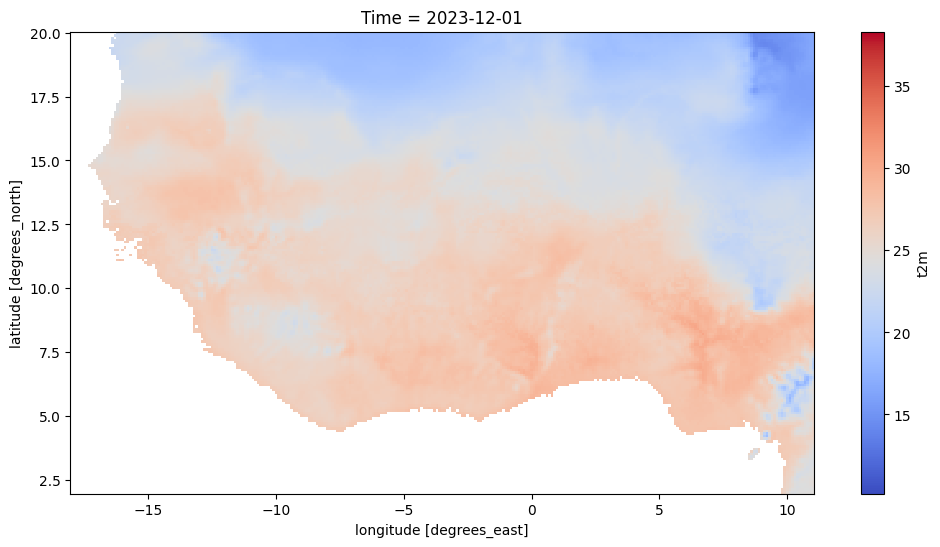

In [24]:
%matplotlib inline 
import matplotlib.animation as animation
from IPython.display import HTML

# Get a handle on the figure and the axes
fig, ax = plt.subplots(figsize=(12,6))
image = era5_Celsius.t2m[0].plot(cmap=plt.cm.coolwarm, vmin=t_min, vmax=t_max, 
                                    cbar_kwargs={'extend':'neither'}
                                  )

ax.set_title("Time = " + str(era5_Celsius.coords['time'].values[0])[:10])


def plot_timestep(t):
    #print(t)
    image.set_array(era5_Celsius.t2m[t,:,:].values.flatten())
    ax.set_title("Time = " + str(era5_Celsius.coords['time'].values[t])[:10])
    return image,
# Run the animation, applying `update()` for each of the times in the variable
animation = animation.FuncAnimation(fig, plot_timestep, frames=range(48), blit=True, interval = 500)

# Save to file or display on screen
#animation.save('era5_2mTemoeratureAnimation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#animation.save("era5_2mTemoeratureAnimation.gif")
HTML(animation.to_jshtml())

## Interactive Time Series Slider using hvplot visualisation

Alternatively we can interactively explore the data using the hvplot library. You can choose any timestep using the slider on the right  

In [30]:
import hvplot.xarray

era5_Celsius.t2m.hvplot.image(cmap='coolwarm',clim=(t_min,t_max), clabel='Temp [C]', width=1200, height=600)

:DynamicMap   [time]
   :Image   [longitude,latitude]   (t2m)

In [11]:
#disable warnings to get rid of some futurewarnings in the slider widget
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Interactive Temperature plot for single Point Time Series 
If you are interested in the time series for single location you can speficy it via the longitude and langitude sliders below

In [28]:
#create Sliders for Lat and Long
import panel as pn
w_lon = pn.widgets.DiscreteSlider(name='Longitue', options=list(era5_Celsius.t2m.longitude.values), value=-8.3)
w_lat = pn.widgets.DiscreteSlider(name='Latitude', options=list(era5_Celsius.t2m.latitude.values), value=13.1)


era5_Celsius.t2m.interactive().sel(longitude=w_lon,latitude=w_lat).hvplot.line(title="Temperature Time Series", ylabel='Temp [C]', width=1200, height=600)



## Creating Violine Plots
A violin plot illustrates how the temperatures are distributed in the AOI for all different month

In [17]:
era5_Celsius.hvplot.violin(y='t2m', by='time.month', title="Temperature Distribution per Month", ylabel='Temp [C]',width=1200, height=600)


:Violin   [time.month]   (t2m)